In [326]:
#Importing packages required
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1.Data Exploration and Preprocessing

In [327]:
#reading the csv file and displaying the data
df = pd.read_csv("StockMarketData.csv") 
print(df.head())
print(df.tail())

  Company        Date Close/Last    Volume     Open       High      Low
0    AAPL  07/17/2023    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL  07/14/2023    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL  07/13/2023    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL  07-12-2023    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL  07-11-2023    $188.08  46638120  $189.16    $189.30  $186.60
      Company        Date Close/Last    Volume      Open      High       Low
25155    NFLX  07/24/2013   $34.4714  33395351  $35.6743  $36.0357  $34.3143
25156    NFLX  07/23/2013   $35.7514  76792963  $35.9143  $37.4621  $35.1714
25157    NFLX  07/22/2013   $37.4228  44791095  $38.1214  $38.3928  $36.7314
25158    NFLX  07/19/2013   $37.7966  18098750  $38.2043  $38.2784  $37.5971
25159    NFLX  07/18/2013   $38.0586  20418642  $38.6157  $38.6157  $37.7143


In [328]:
#Displaying info of my dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


As you can see the data type is not in numeric so converting the object data type to int/float type in the below steps.

In [329]:
# Define columns to convert
dollar_columns = ['Open', 'High', 'Low', 'Close/Last']

# Remove '$' and convert to numeric
for col in dollar_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

In [330]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,193.99,50520160,191.90,194.3200,191.81
1,AAPL,07/14/2023,190.69,41616240,190.23,191.1799,189.63
2,AAPL,07/13/2023,190.54,41342340,190.50,191.1900,189.78
3,AAPL,07-12-2023,189.77,60750250,189.68,191.7000,188.47
4,AAPL,07-11-2023,188.08,46638120,189.16,189.3000,186.60


In the above step we removed the '$' symbols from all data

In the below steps as the data in the Date column is not uniform, because some of the data had '-', replaced them with '/' and made it standard.
Also as the date is in mm/dd/yyy form and is not much useful in the predecting, to get more use of the data more coulmns were created to find trends if any were present based on the date.

In [331]:
df['Date'] = df['Date'].str.replace('-', '/')

In [332]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,193.99,50520160,191.90,194.3200,191.81
1,AAPL,07/14/2023,190.69,41616240,190.23,191.1799,189.63
2,AAPL,07/13/2023,190.54,41342340,190.50,191.1900,189.78
3,AAPL,07/12/2023,189.77,60750250,189.68,191.7000,188.47
4,AAPL,07/11/2023,188.08,46638120,189.16,189.3000,186.60


In [333]:
df['Date'] = pd.to_datetime(df['Date'])

In [334]:
# Extract date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfMonth'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week  # Extract ISO week number
df['IsWeekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype(int)  # 1 if weekend, 0 otherwise

In [335]:
df.tail()

,Company,Date,Close/Last,Volume,Open,High,Low,Year,Month,DayOfWeek,DayOfMonth,WeekOfYear,IsWeekend
25155,NFLX,2013-07-24,34.4714,33395351,35.6743,36.0357,34.3143,2013,7,2,24,30,0
25156,NFLX,2013-07-23,35.7514,76792963,35.9143,37.4621,35.1714,2013,7,1,23,30,0
25157,NFLX,2013-07-22,37.4228,44791095,38.1214,38.3928,36.7314,2013,7,0,22,30,0
25158,NFLX,2013-07-19,37.7966,18098750,38.2043,38.2784,37.5971,2013,7,4,19,29,0
25159,NFLX,2013-07-18,38.0586,20418642,38.6157,38.6157,37.7143,2013,7,3,18,29,0


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     25160 non-null  object        
 1   Date        25160 non-null  datetime64[ns]
 2   Close/Last  25160 non-null  float64       
 3   Volume      25160 non-null  int64         
 4   Open        25160 non-null  float64       
 5   High        25160 non-null  float64       
 6   Low         25160 non-null  float64       
 7   Year        25160 non-null  int32         
 8   Month       25160 non-null  int32         
 9   DayOfWeek   25160 non-null  int32         
 10  DayOfMonth  25160 non-null  int32         
 11  WeekOfYear  25160 non-null  UInt32        
 12  IsWeekend   25160 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(4), int32(4), int64(2), object(1)
memory usage: 2.0+ MB


Below are the stastical anaylsis of the the numeric data 

In [337]:
df.describe()

,Date,Close/Last,Volume,Open,High,Low,Year,Month,DayOfWeek,DayOfMonth,WeekOfYear,IsWeekend
count,25160,25160.000000,2.516000e+04,25160.000000,25160.000000,25160.000000,25160.000000,25160.000000,25160.000000,25160.000000,25160.0,25160.0
mean,2018-07-15 16:11:49.697933056,102.455878,5.131764e+07,102.430761,103.829305,101.006112,2018.035374,6.548092,2.023052,15.744833,26.653021,0.0
min,2013-07-18 00:00:00,1.620000,1.143952e+06,1.620000,1.690000,1.610000,2013.000000,1.000000,0.000000,1.000000,1.0,0.0
25%,2016-01-14 18:00:00,36.567500,1.200394e+07,36.507500,36.890000,36.128000,2016.000000,4.000000,1.000000,8.000000,14.0,0.0
50%,2018-07-16 12:00:00,65.680000,2.672083e+07,65.650000,66.486900,64.915500,2018.000000,7.000000,2.000000,16.000000,27.0,0.0
75%,2021-01-13 06:00:00,134.235025,6.857269e+07,134.320000,136.233525,132.660000,2021.000000,10.000000,3.000000,23.000000,40.0,0.0
max,2023-07-17 00:00:00,691.690000,1.065209e+09,692.350000,700.989400,686.090000,2023.000000,12.000000,4.000000,31.000000,53.0,0.0
std,NaN,101.991372,6.399143e+07,101.996115,103.529523,100.399743,2.913342,3.426630,1.399077,8.755554,14.96953,0.0


Checking the number of companies in the dataframe

In [338]:
df.Company.unique().size

10

Checking if ther are any null values present in the data

In [339]:
df.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Year          0
Month         0
DayOfWeek     0
DayOfMonth    0
WeekOfYear    0
IsWeekend     0
dtype: int64

Below is the line plot useful for visually comparing the trend of Close/Last prices over time (Date) across different companies (Company). It helps in identifying patterns, fluctuations, and relative performance of companies in terms of their closing prices.

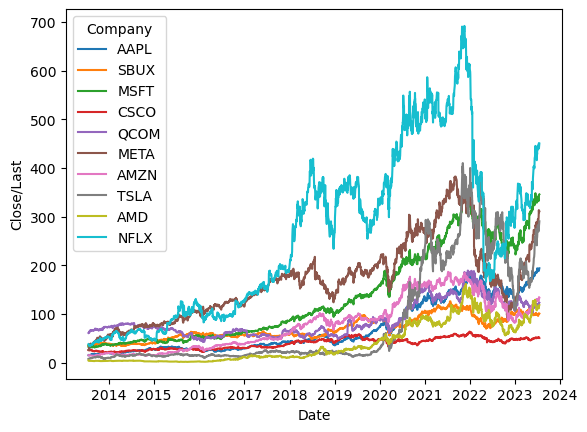

In [340]:
sns.lineplot(data=df, x='Date', y='Close/Last', hue='Company')
plt.show()

In [341]:
# Compute the stock price difference between oldest(2013-07-18) and Newset(2023-07-17)
stock_price_diff = pd.DataFrame(list(stock_price_raise.items()),
                                columns=['Company', 'Close/Last'])
stock_price_diff = stock_price_diff.sort_values(by=['Close/Last'], ascending=False)
stock_price_diff

,Company,Close/Last
9,NFLX,411.9914
2,MSFT,310.2900
5,META,284.4400
7,TSLA,282.4447
0,AAPL,178.5701
6,AMZN,118.3545
8,AMD,113.6800
1,SBUX,66.6900
4,QCOM,62.2850
3,CSCO,24.9500


[Text(0.5, 1.0, 'Stock Price Difference Between 2013-07-18 and 2023-07-17')]

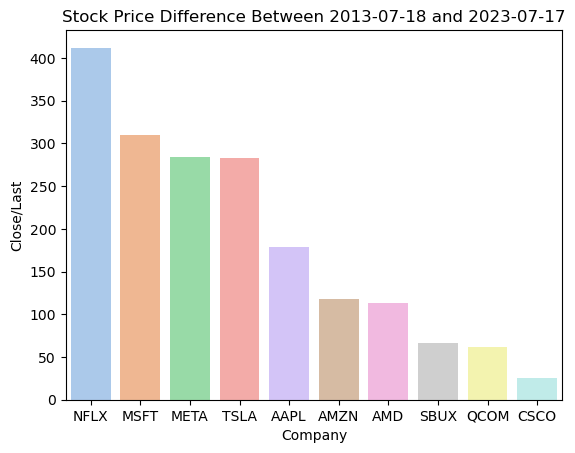

In [342]:
colors = sns.color_palette("pastel")
sns.barplot(x='Company',
            y='Close/Last',
            palette=colors,
            data=stock_price_diff).set(title='Stock Price Difference Between 2013-07-18 and 2023-07-17')

As from the above plot we can see that Netflix has high swings so we will be going forward with NFLX company for the rest of our case.

In [343]:
# Calculate the difference between the latest and oldest stock price for a given company
oldest_date_stock_price = df['Close/Last'][(df['Date']==min(df['Date'])) & (df['Company']=='NFLX')].values[0]
lastest_date_stock_price = df['Close/Last'][(df['Date']==max(df['Date'])) & (df['Company']=='NFLX')].values[0]
difference = lastest_date_stock_price - oldest_date_stock_price


def stock_price_rise():

    stock_rise = {}
    # Get a list of unique company names from the 'Company' column
    company_name = df['Company'].unique().tolist()

    for ticker in company_name:
        # Get the oldest stock price for the current company
        oldest_date_stock_price = df['Close/Last'][(df['Date']==min(df['Date'])) & (df['Company']==ticker)].values[0]
        # Get the latest stock price for the current company
        lastest_date_stock_price = df['Close/Last'][(df['Date']==max(df['Date'])) & (df['Company']==ticker)].values[0]
        difference = lastest_date_stock_price - oldest_date_stock_price
        stock_rise[ticker] = difference

    return stock_rise

stock_price_raise = stock_price_rise()
stock_price_raise

{'AAPL': 178.5701,
 'SBUX': 66.69,
 'MSFT': 310.29,
 'CSCO': 24.950000000000003,
 'QCOM': 62.285000000000004,
 'META': 284.44,
 'AMZN': 118.3545,
 'TSLA': 282.4447,
 'AMD': 113.67999999999999,
 'NFLX': 411.9914}

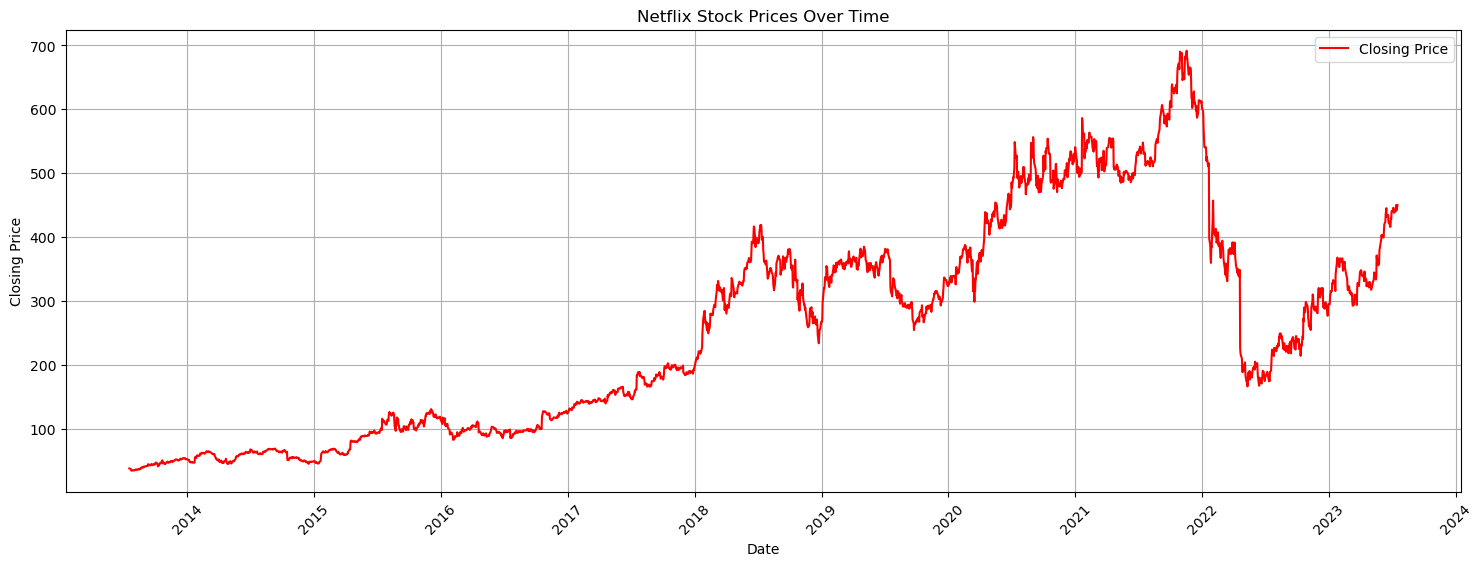

In [344]:
NFLXdf = df[df['Company'] == 'NFLX']

# Line chart for stock prices over time
plt.figure(figsize=(18, 6))
plt.plot(NFLXdf['Date'], NFLXdf['Close/Last'], color='red',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Netflix Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

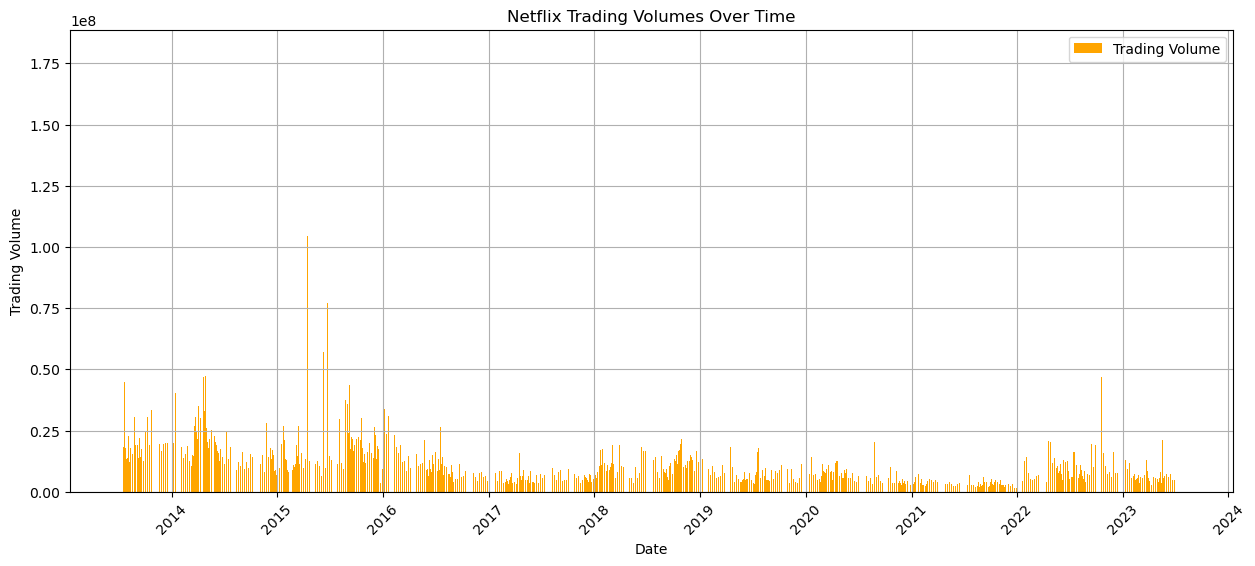

In [345]:
# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(NFLXdf['Date'], NFLXdf['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Netflix Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

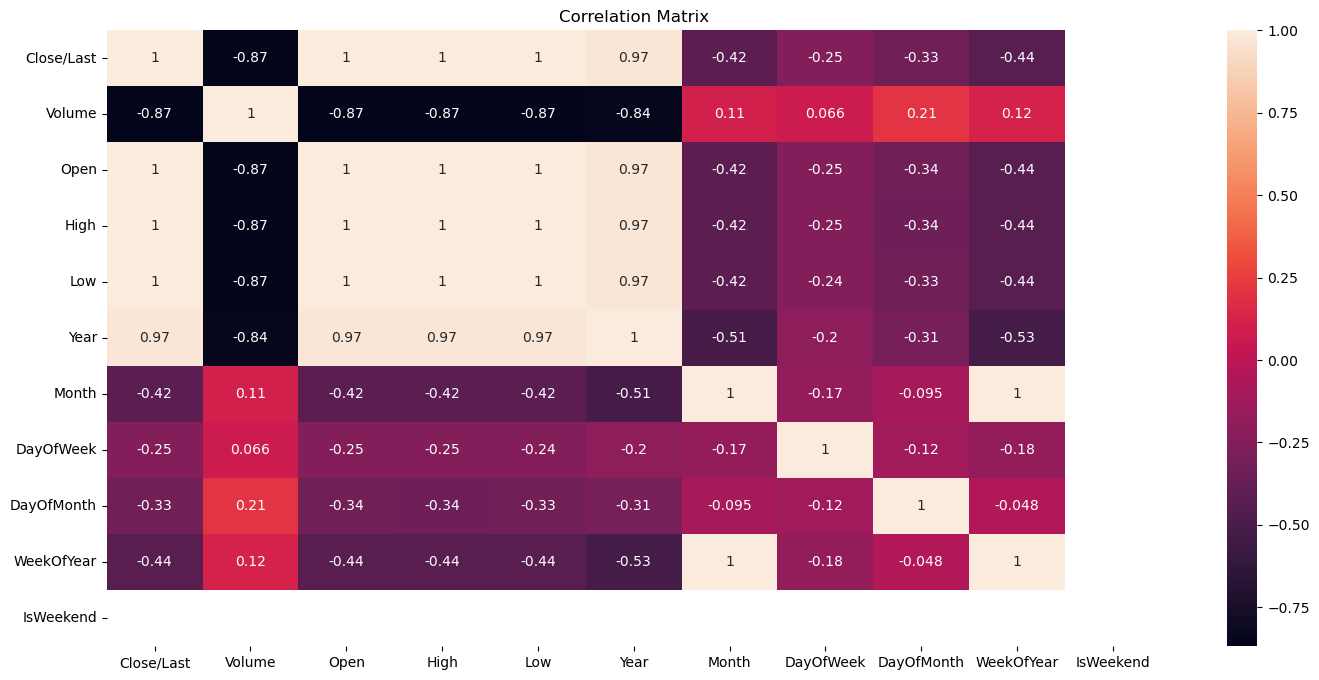

In [346]:
# Heatmap to visualize correlations between numeric columns
correlation_matrix = NFLXdf.corr(numeric_only=True)
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(correlation_matrix.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

In [347]:
print(correlation_matrix)

            Close/Last    Volume      Open      High       Low      Year  \
Close/Last    1.000000 -0.438113  0.999304  0.999692  0.999670  0.797663   
Volume       -0.438113  1.000000 -0.438509 -0.434287 -0.443277 -0.421938   
Open          0.999304 -0.438509  1.000000  0.999676  0.999681  0.796997   
High          0.999692 -0.434287  0.999676  1.000000  0.999590  0.799073   
Low           0.999670 -0.443277  0.999681  0.999590  1.000000  0.795830   
Year          0.797663 -0.421938  0.796997  0.799073  0.795830  1.000000   
Month        -0.019445 -0.041507 -0.019233 -0.019789 -0.018555 -0.146431   
DayOfWeek    -0.001561 -0.015039 -0.000484 -0.001455 -0.000615  0.005456   
DayOfMonth   -0.009864  0.055789 -0.009954 -0.009878 -0.009461 -0.014309   
WeekOfYear   -0.018273 -0.028965 -0.018071 -0.018541 -0.017459 -0.146408   
IsWeekend          NaN       NaN       NaN       NaN       NaN       NaN   

               Month  DayOfWeek  DayOfMonth  WeekOfYear  IsWeekend  
Close/Last -0.0194

My correlation matrix doesn't immediately suggest the need for the typical "balancing bias" interventions seen in categorical data.

Using z-score to find the outliers, as the IsWeekend column does have any valid value that is as the stock market is closed on weekends, all the columns would be '0', hence this data is not usefull for us, so removing the column.


<Axes: >

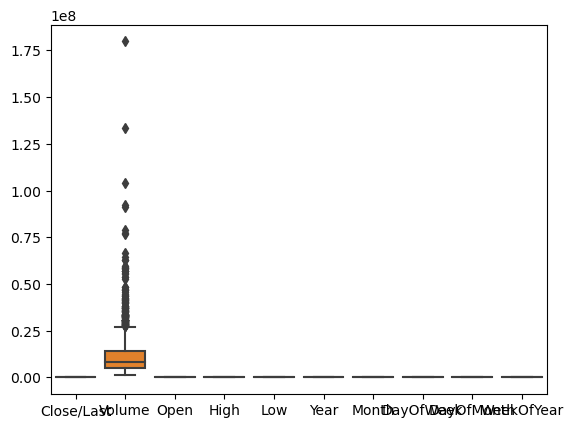

In [348]:
# Select the required columns
NFLXdf2 = NFLXdf[['Close/Last','Volume','Open','High','Low','Year','Month','DayOfWeek','DayOfMonth','WeekOfYear']]

#Visulazing the outliers with the help of Boxplot
sns.boxplot(data=NFLXdf2)

From the above plot we can see that there are outliers in the volume data. so using z-score the outlier will be detected and those ouliers will be removed.

In [349]:
# Calculate z-scores
NFLXdf2m = NFLXdf2.mean()
NFLXdf2sd = NFLXdf2.std()
NFLXdf2mc = NFLXdf2 - NFLXdf2m
zs = np.abs(NFLXdf2mc / NFLXdf2sd)
print(zs)

       Close/Last    Volume      Open      High       Low      Year     Month  \
22644    1.145304  0.428343  1.118385  1.144939  1.157342  1.703795  0.131858   
22645    1.097070  0.399200  1.161114  1.143770  1.124845  1.703795  0.131858   
22646    1.147260  0.501879  1.126854  1.115670  1.133725  1.703795  0.131858   
22647    1.109751  0.543985  1.112345  1.079089  1.113118  1.703795  0.131858   
22648    1.086996  0.658402  1.077403  1.052166  1.072789  1.703795  0.131858   
...           ...       ...       ...       ...       ...       ...       ...   
25155    1.317240  2.191482  1.309112  1.312515  1.312364  1.728075  0.131858   
25156    1.309655  6.482764  1.307690  1.304182  1.307211  1.728075  0.131858   
25157    1.299751  3.318326  1.294620  1.298744  1.297832  1.728075  0.131858   
25158    1.297536  0.678909  1.294129  1.299413  1.292627  1.728075  0.131858   
25159    1.295984  0.908307  1.291692  1.297442  1.291923  1.728075  0.131858   

       DayOfWeek  DayOfMont

In [350]:
# Identify rows where any column has a z-score greater than 3
o = (zs > 3).any(axis=1)
print(o)
print("There are", o.sum(), "outliers")

22644    False
22645    False
22646    False
22647    False
22648    False
         ...  
25155    False
25156     True
25157     True
25158    False
25159    False
Length: 2516, dtype: bool
There are 40 outliers


In [351]:
# Filter rows where all z-scores are less than 3
NFLXdf2_clean = NFLXdf2[~o]
print(NFLXdf2_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2476 entries, 22644 to 25159
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2476 non-null   float64
 1   Volume      2476 non-null   int64  
 2   Open        2476 non-null   float64
 3   High        2476 non-null   float64
 4   Low         2476 non-null   float64
 5   Year        2476 non-null   int32  
 6   Month       2476 non-null   int32  
 7   DayOfWeek   2476 non-null   int32  
 8   DayOfMonth  2476 non-null   int32  
 9   WeekOfYear  2476 non-null   UInt32 
dtypes: UInt32(1), float64(4), int32(4), int64(1)
memory usage: 166.8 KB
None


Now that outliers are removed from the data set, now Normalizing the data using MinMaxScaler can be done

In [352]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Save the column names for later use (before scaling)
columns = NFLXdf2_clean.columns

# Fit and transform the data
NFLXdf2_clean_scaled_array = scaler.fit_transform(NFLXdf2_clean)

# Convert the scaled array back to a DataFrame
NFLXdf2_clean_scaled = pd.DataFrame(NFLXdf2_clean_scaled_array, columns=columns)

# Check the first 10 rows of the normalized data
print(NFLXdf2_clean_scaled.head(10))

   Close/Last    Volume      Open      High       Low  Year     Month  \
0    0.632329  0.142569  0.624945  0.633007  0.630288   1.0  0.545455   
1    0.619944  0.149868  0.635911  0.632707  0.621995   1.0  0.545455   
2    0.632831  0.124154  0.627119  0.625482  0.624261   1.0  0.545455   
3    0.623200  0.113609  0.623395  0.616076  0.619003   1.0  0.545455   
4    0.617357  0.084955  0.614428  0.609153  0.608712   1.0  0.545455   
5    0.619639  0.076960  0.614231  0.614576  0.617577   1.0  0.545455   
6    0.614147  0.074816  0.614353  0.611444  0.616066   1.0  0.545455   
7    0.615273  0.094125  0.616480  0.612157  0.608218   1.0  0.545455   
8    0.626015  0.141932  0.623942  0.624430  0.621879   1.0  0.545455   
9    0.619229  0.064002  0.616115  0.610272  0.609599   1.0  0.545455   

   DayOfWeek  DayOfMonth  WeekOfYear  
0       0.00    0.533333    0.538462  
1       1.00    0.433333    0.519231  
2       0.75    0.400000    0.519231  
3       0.50    0.366667    0.519231  
4

In [353]:
NFLXdf2_clean_scaled.head()

,Close/Last,Volume,Open,High,Low,Year,Month,DayOfWeek,DayOfMonth,WeekOfYear
0,0.632329,0.142569,0.624945,0.633007,0.630288,1.0,0.545455,0.00,0.533333,0.538462
1,0.619944,0.149868,0.635911,0.632707,0.621995,1.0,0.545455,1.00,0.433333,0.519231
2,0.632831,0.124154,0.627119,0.625482,0.624261,1.0,0.545455,0.75,0.400000,0.519231
3,0.623200,0.113609,0.623395,0.616076,0.619003,1.0,0.545455,0.50,0.366667,0.519231
4,0.617357,0.084955,0.614428,0.609153,0.608712,1.0,0.545455,0.25,0.333333,0.519231


encoding is not done as we are not using categorical data(Company and Date) and not passing it to the machine as we are doing liner regression only to predict the stock price of one company, so we are not converting them into numerical 

## 3. Feature Selection

This study is using supervised learning here the labeled data is passed to the machine and Simple Linear Regression method is being used.

In [354]:
NFLXdf2_clean_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2476 non-null   float64
 1   Volume      2476 non-null   float64
 2   Open        2476 non-null   float64
 3   High        2476 non-null   float64
 4   Low         2476 non-null   float64
 5   Year        2476 non-null   float64
 6   Month       2476 non-null   float64
 7   DayOfWeek   2476 non-null   float64
 8   DayOfMonth  2476 non-null   float64
 9   WeekOfYear  2476 non-null   float64
dtypes: float64(10)
memory usage: 193.6 KB


This study uses only 'Open'coulmn because as seen in the correlation matrix the relation between the target variable(Close/Last) and the open variable suggest that there is a high correlation between them moreover the other data such as volume and date does not have much correlation, furthermore the data such as High, Low are calculated only after the end, so it's not possible to predict the closing price of the stock when you don't know the highs and lows of the stock and as open price comes at the start of the market it is only makes sense to use that as predictor variable.

In [355]:
X = NFLXdf2_clean_scaled[['Open']]  # Predictor variable
y = NFLXdf2_clean_scaled['Close/Last']  # Target variable

## 4.Splitting Data for Training and Testing

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Model Selection and Training

In [357]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [358]:
y_pred = model.predict(X_test)


## 6. Model Evaluation

In [359]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Calculate prediction percentage (percentage of variance explained)
prediction_percentage = r2 * 100
print(f"Prediction Percentage: {prediction_percentage:.2f}%")



Mean Squared Error: 7.204846866738338e-05
R-squared: 0.9989446309315028
Prediction Percentage: 99.89%


## 7.Visualizing


Predictions

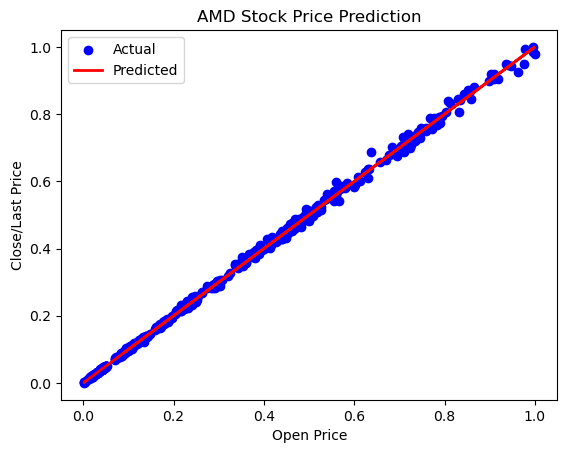

In [360]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close/Last Price')
plt.title('AMD Stock Price Prediction')
plt.legend()
plt.show()